<a href="https://colab.research.google.com/github/sandeepkher/MLGP-Project1/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
#!pip install dabl

In [167]:
#!pip install autoviz

In [168]:
# from google.colab import auth
# from google.colab import drive
# from oauth2client.client import GoogleCredentials

# auth.authenticate_user()
# credentials = GoogleCredentials.get_application_default()

# drive = drive.mount('/content/drive', credentials)

In [169]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [170]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#import dabl

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default = 'notebook'

from collections import Counter
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, classification_report,
                             recall_score, precision_score, f1_score,
                             confusion_matrix)
from mlxtend.evaluate import mcnemar_table, mcnemar_tables
from mlxtend.plotting import checkerboard_plot, plot_decision_regions
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [171]:
filename = "/content/drive/My Drive/MLGP/Project_1/RTA Dataset.csv"
df = pd.read_csv(filename)
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [172]:
#from autoviz.AutoViz_Class import AutoViz_Class

#AV = AutoViz_Class()

#AV.AutoViz(filename, sep=',', depVar='Accident_severity', dfte=df, header=0, verbose=0,
#                            lowess=False,chart_format='png',max_rows_analyzed=150000,max_cols_analyzed=35)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [174]:
df.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [175]:
df.duplicated().sum()

0

In [176]:
df.describe(include = ['O']).T

,count,unique,top,freq
Time,12316,1074,15:30:00,120
Day_of_week,12316,7,Friday,2041
Age_band_of_driver,12316,5,18-30,4271
Sex_of_driver,12316,3,Male,11437
Educational_level,11575,7,Junior high school,7619
Vehicle_driver_relation,11737,4,Employee,9627
Driving_experience,11487,7,5-10yr,3363
Type_of_vehicle,11366,17,Automobile,3205
Owner_of_vehicle,11834,4,Owner,10459
Service_year_of_vehicle,8388,6,Unknown,2883


In [177]:
# From above, we conclude to drop below columns
# Type_of_vehicle: seems irrelevant
# Service_year_of_vehicle: 3928 NaN, followed by 2883 counts of unknowns
# Defect_of_vehicle: 4427NaN,  Too many NA, followed by 7777 counts of no defect
# Work_of_casuality: 3198 NaN
# Fitness_of_casuality: 2635 NaN

In [178]:
df1 = df.drop(['Type_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle', 'Work_of_casuality', 'Fitness_of_casuality'], axis = 1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Owner_of_vehicle             11834 non-null  object
 8   Area_accident_occured        12077 non-null  object
 9   Lanes_or_Medians             11931 non-null  object
 10  Road_allignment              12174 non-null  object
 11  Types_of_Junction            11429 non-null  object
 12  Road_surface_type            12144 non-null  object
 13  Road_surface_conditions      12

In [179]:
df1.isna().sum()

Time                             0
Day_of_week                      0
Age_band_of_driver               0
Sex_of_driver                    0
Educational_level              741
Vehicle_driver_relation        579
Driving_experience             829
Owner_of_vehicle               482
Area_accident_occured          239
Lanes_or_Medians               385
Road_allignment                142
Types_of_Junction              887
Road_surface_type              172
Road_surface_conditions          0
Light_conditions                 0
Weather_conditions               0
Type_of_collision              155
Number_of_vehicles_involved      0
Number_of_casualties             0
Vehicle_movement               308
Casualty_class                   0
Sex_of_casualty                  0
Age_band_of_casualty             0
Casualty_severity                0
Pedestrian_movement              0
Cause_of_accident                0
Accident_severity                0
dtype: int64

In [180]:
for i in df1.columns:
  print(f"Value counts in {i}:")
  print(df1[i].value_counts(dropna =  False),'\n')

Value counts in Time:
15:30:00    120
17:10:00    110
18:30:00    103
11:30:00     99
17:00:00     98
           ... 
19:04:00      1
20:36:00      1
22:54:00      1
21:03:00      1
2:47:00       1
Name: Time, Length: 1074, dtype: int64 

Value counts in Day_of_week:
Friday       2041
Thursday     1851
Wednesday    1840
Tuesday      1770
Monday       1681
Saturday     1666
Sunday       1467
Name: Day_of_week, dtype: int64 

Value counts in Age_band_of_driver:
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: Age_band_of_driver, dtype: int64 

Value counts in Sex_of_driver:
Male       11437
Female       701
Unknown      178
Name: Sex_of_driver, dtype: int64 

Value counts in Educational_level:
Junior high school    7619
Elementary school     2163
High school           1110
NaN                    741
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: Educational_level, dtype: int64 

V

In [181]:
for i in df1.columns:
  df1[i].fillna(df1[i].mode()[0],inplace = True)   #df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

In [182]:
df.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [183]:
df1['Driving_experience'].replace('unknown','Unknown',inplace = True)

In [184]:
for i in df1.columns:
  df1[i].replace('na', 'Unknown', inplace = True)

In [185]:
print("Unique values per column:")
df1.nunique()

Unique values per column:


Time                           1074
Day_of_week                       7
Age_band_of_driver                5
Sex_of_driver                     3
Educational_level                 7
Vehicle_driver_relation           4
Driving_experience                7
Owner_of_vehicle                  4
Area_accident_occured            14
Lanes_or_Medians                  7
Road_allignment                   9
Types_of_Junction                 8
Road_surface_type                 5
Road_surface_conditions           4
Light_conditions                  4
Weather_conditions                9
Type_of_collision                10
Number_of_vehicles_involved       6
Number_of_casualties              8
Vehicle_movement                 13
Casualty_class                    4
Sex_of_casualty                   3
Age_band_of_casualty              6
Casualty_severity                 4
Pedestrian_movement               9
Cause_of_accident                20
Accident_severity                 3
dtype: int64

In [186]:
df1.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [187]:
for i in df1.columns:
    print(f"Unique value in {i}:")
    print(df1[i].unique(),)
    print(f"Total Unique Values Count: ",df1[i].nunique(),'\n')

Unique value in Time:
['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00']
Total Unique Values Count:  1074 

Unique value in Day_of_week:
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
Total Unique Values Count:  7 

Unique value in Age_band_of_driver:
['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
Total Unique Values Count:  5 

Unique value in Sex_of_driver:
['Male' 'Female' 'Unknown']
Total Unique Values Count:  3 

Unique value in Educational_level:
['Above high school' 'Junior high school' 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']
Total Unique Values Count:  7 

Unique value in Vehicle_driver_relation:
['Employee' 'Unknown' 'Owner' 'Other']
Total Unique Values Count:  4 

Unique value in Driving_experience:
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' 'No Licence' 'Below 1yr' 'Unknown']
Total Unique Values Count:  7 

Unique value in Owner_of_vehicle:
['Owner' 'Governmental' 'Organization' 'Other']
Total U

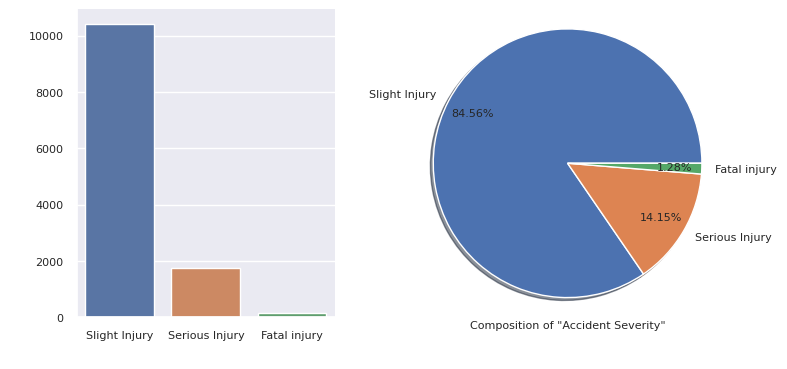

In [188]:
# Checking the target variable
plt.figure(figsize = (8,4))

# Barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x = df1['Accident_severity'])
ax1.set_xlabel(" ")
ax1.set_ylabel (" ")
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
sns.despine(top = True, right = True)

#Pieplot
ax2 = plt.subplot(1,2,2)
plt.pie(df1['Accident_severity'].value_counts(),
        labels = list(df1['Accident_severity'].unique()),
        autopct = '%1.2f%%',
        pctdistance = 0.8,
        shadow = True,
        radius = 1.3,
        textprops = {'fontsize':8}
        )
ax2.set_xlabel(" ")
plt.xlabel('Composition of "Accident Severity"', fontsize=8, labelpad=20)
plt.subplots_adjust(wspace=0.4)

plt.show()

In [189]:
# Converting 'Time' to datetime
df1['Time'] = pd.to_datetime(df1['Time'])

df1['Time'].dt.hour

# extracting hour and minute from timestamp
df1['Hour'] = df1['Time'].dt.hour
df1['Minute'] = df1['Time'].dt.minute
df1.drop('Time', axis=1, inplace=True)

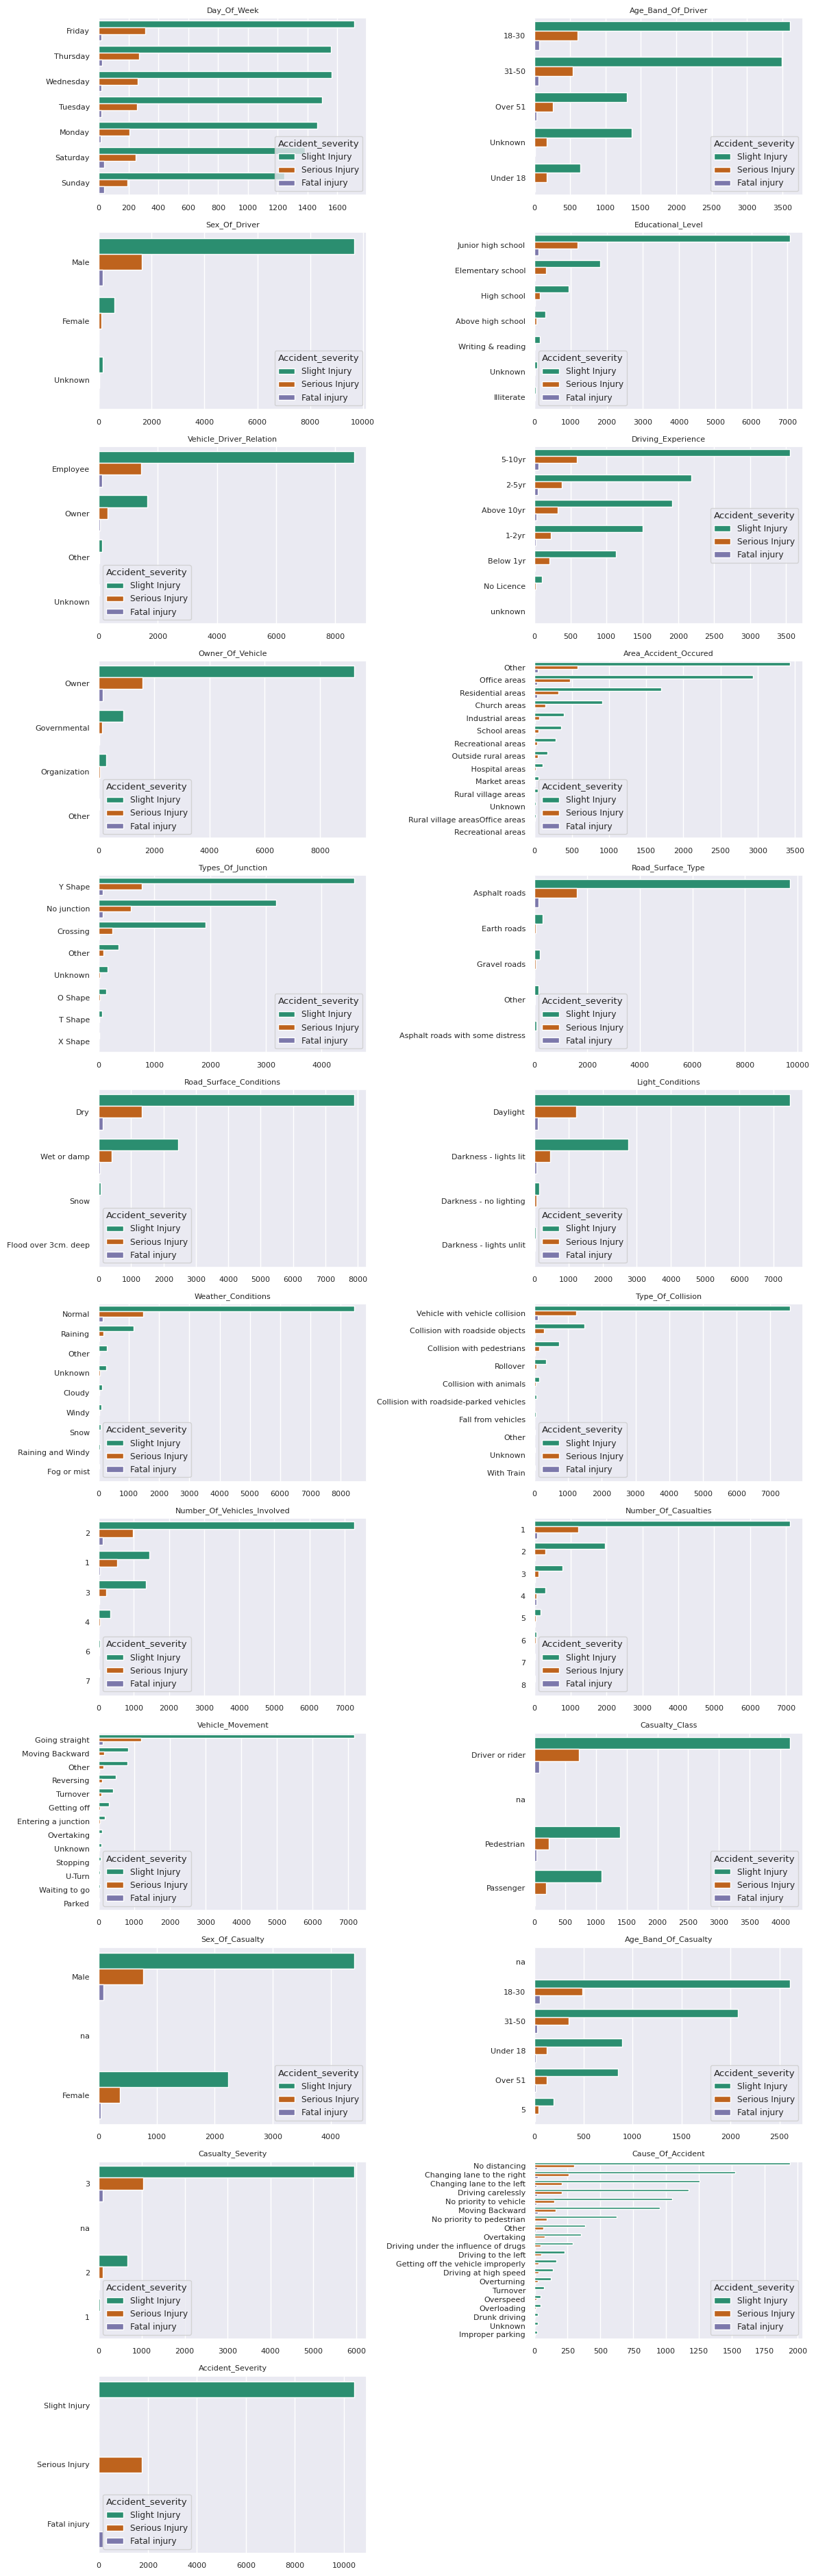

In [190]:

plt.figure(figsize=(12,50))
plotnumber = 1

for col in df1.drop(['Hour', 'Minute', 'Lanes_or_Medians', 'Road_allignment', 'Pedestrian_movement'], axis=1):
    if plotnumber <= df1.shape[1]:
        ax1 = plt.subplot(16,2,plotnumber)
        sns.countplot(data=df1, y=col, palette='Dark2', order = df[col].value_counts().index, hue = 'Accident_severity')
        plt.xticks(fontsize=8)
        plt.yticks(fontsize=8)
        plt.title(col.title(), fontsize=8)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

## Observations


*   Although most of the accidents occur on Fridays, there is not much variance between all other days
*   Most of the accidents are caused by drivers etween the age bands of 18-30 and 31-50
*   Majority of accident causing drivers are 'Male' and are 'Junior High School' passout
*   Majority of the drivers are employees and have driving experience between 5 to 10 years
*   most accidents are caused by Automobiles and are private owned vehicles
*   For most of the vehicles causing accidents, it was unknown when the vehicle was last serviced
*   The majority of the vehicles were not defective
*   Majority of accidents happened in office areas and on Y-junctions
*   Most of the accidents happened on Asphalt roads with dry conditions
*   Most of the accidents happened during Daytime and normal weather conditions
*   In most accidents, it was vehicle-to-vehicle collision and 2 vehicles were involved

## Observations regarding Casualties
*   In Most of the cases, no of caualties were a single person and accident was caused by vehicles going straight
*   Majority of the Casualty class is of drivers and unknowns. We may drop this column as large values of casualty class is unknown.
*   Majority of drivers invloved in accidents are male or are unknown. We will find out if there is a correlation between sex of drivers and severity.If no relation, we will drop this column too.
*   Age of the majority of drivers casuing accidents is unknown, followed by young drivers between age group 18-30
*   Severity of casualities for most accidents is 3, caused mainly by drivers, who are fit mostly
*   Major cause of accidents is due to no distancing between 2 vehicles and changing lanes









In [191]:
# 'Hour', 'Minute', 'Lanes_or_Medians', 'Road_allignment', 'Pedestrian_movement'

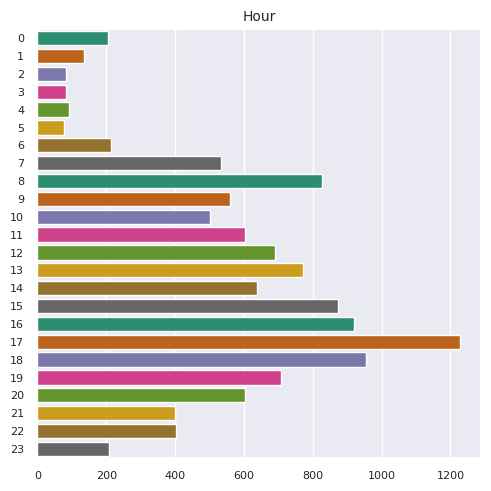

In [192]:
# Check Hours and Time
plt.figure(figsize=(5,5))
sns.countplot(data=df1, y='Hour', palette = 'Dark2')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Hour', fontsize=10)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

*   Majority of the accidents happen between 2pm - 7pm. Also large number of accidents happen in the morning betwene 8am-9am, may be because of office rush hour

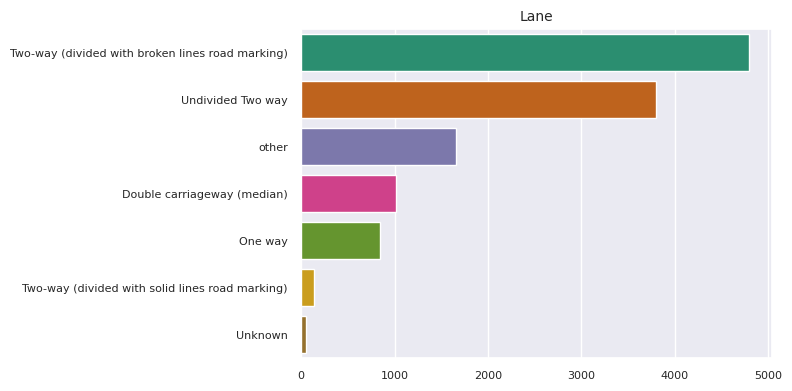

In [193]:
# Check Lanes and Time
plt.figure(figsize=(8,4))
sns.countplot(data=df1, y='Lanes_or_Medians', order = df1['Lanes_or_Medians'].value_counts().index, palette = 'Dark2')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Lane', fontsize=10)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

* Most of the accidents happen on 2 way roads (divided or undevided)

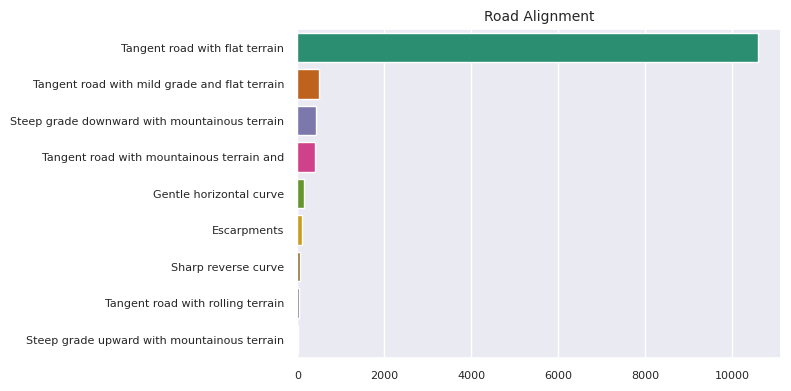

In [194]:
# Check Road Alignment
plt.figure(figsize=(8,4))
sns.countplot(data=df1, y='Road_allignment', order = df1['Road_allignment'].value_counts().index, palette = 'Dark2')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Road Alignment', fontsize=10)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

*  Almost all accidents happen on tangent roads with fat terrain

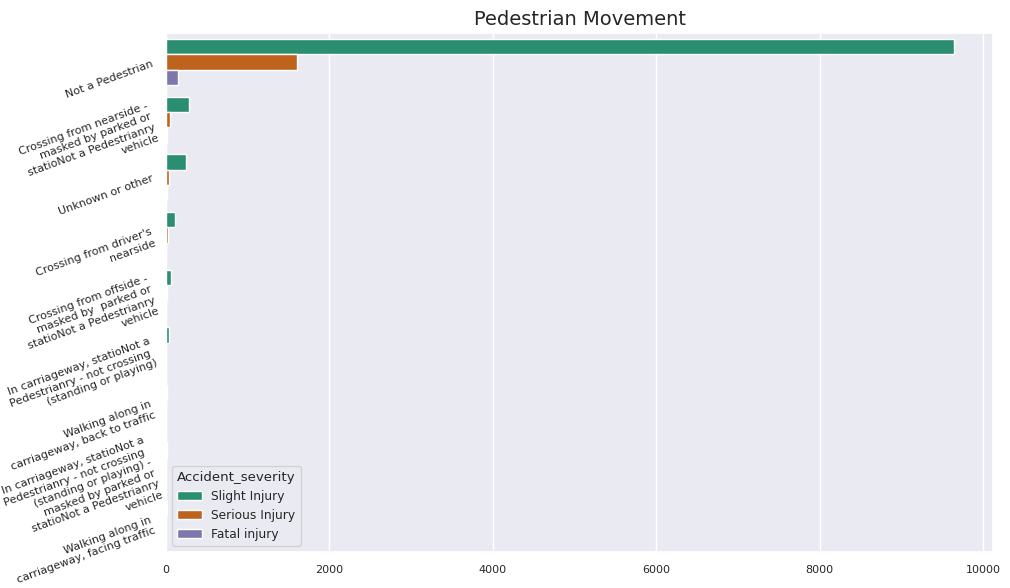

In [195]:
# Check Pedestrian movement
plt.figure(figsize=(10,6))
sns.countplot(data=df1, y='Pedestrian_movement', palette = 'Dark2', hue = 'Accident_severity', order = df1['Pedestrian_movement'].value_counts().index, orient = 'Vertical')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8, rotation = 20, wrap = True)
plt.title('Pedestrian Movement', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

*  Almost all accidents happen between vehicles where no pedestrians are invloved

In [196]:
# We notice that although most of the accidents caused are on Fridays, but most fatal accidents are caused on weekends

In [197]:
col_num = 0
for col in df1.drop(['Minute'], axis=1):
    if col_num <= df1.shape[1]:
        print(pd.crosstab(index = df1[col],columns = df['Accident_severity']), "\n", "\n")
    col_num +=1

Accident_severity  Fatal injury  Serious Injury  Slight Injury
Day_of_week                                                   
Friday                       16             313           1712
Monday                       12             204           1465
Saturday                     37             245           1384
Sunday                       35             190           1242
Thursday                     22             272           1557
Tuesday                      17             257           1496
Wednesday                    19             262           1559 
 

Accident_severity   Fatal injury  Serious Injury  Slight Injury
Age_band_of_driver                                             
18-30                         62             604           3605
31-50                         54             541           3492
Over 51                       24             257           1304
Under 18                      12             169            644
Unknown                        6             

In [198]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Age_band_of_driver           12316 non-null  object
 2   Sex_of_driver                12316 non-null  object
 3   Educational_level            12316 non-null  object
 4   Vehicle_driver_relation      12316 non-null  object
 5   Driving_experience           12316 non-null  object
 6   Owner_of_vehicle             12316 non-null  object
 7   Area_accident_occured        12316 non-null  object
 8   Lanes_or_Medians             12316 non-null  object
 9   Road_allignment              12316 non-null  object
 10  Types_of_Junction            12316 non-null  object
 11  Road_surface_type            12316 non-null  object
 12  Road_surface_conditions      12316 non-null  object
 13  Light_conditions             12

In [199]:
# df1 = df1.drop(['Vehicle_driver_relation'], axis=1)

In [200]:
from sklearn.preprocessing import OrdinalEncoder
ode = OrdinalEncoder()
ode

OrdinalEncoder()

In [201]:
df_encoded = ode.fit_transform(df1)
df_encoded
df_new = pd.DataFrame(df_encoded, columns = df1.columns)
df_new.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour,Minute
0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,9.0,2.0,5.0,...,2.0,3.0,2.0,5.0,3.0,5.0,9.0,2.0,17.0,2.0
1,1.0,1.0,1.0,4.0,0.0,3.0,3.0,6.0,4.0,5.0,...,2.0,3.0,2.0,5.0,3.0,5.0,16.0,2.0,17.0,2.0
2,1.0,0.0,1.0,4.0,0.0,0.0,3.0,1.0,6.0,5.0,...,2.0,0.0,1.0,1.0,2.0,5.0,0.0,1.0,17.0,2.0
3,3.0,0.0,1.0,4.0,0.0,2.0,0.0,6.0,6.0,6.0,...,2.0,2.0,0.0,0.0,2.0,5.0,1.0,2.0,1.0,6.0
4,3.0,0.0,1.0,4.0,0.0,1.0,3.0,4.0,6.0,5.0,...,2.0,3.0,2.0,5.0,3.0,5.0,16.0,2.0,1.0,6.0


<Axes: >

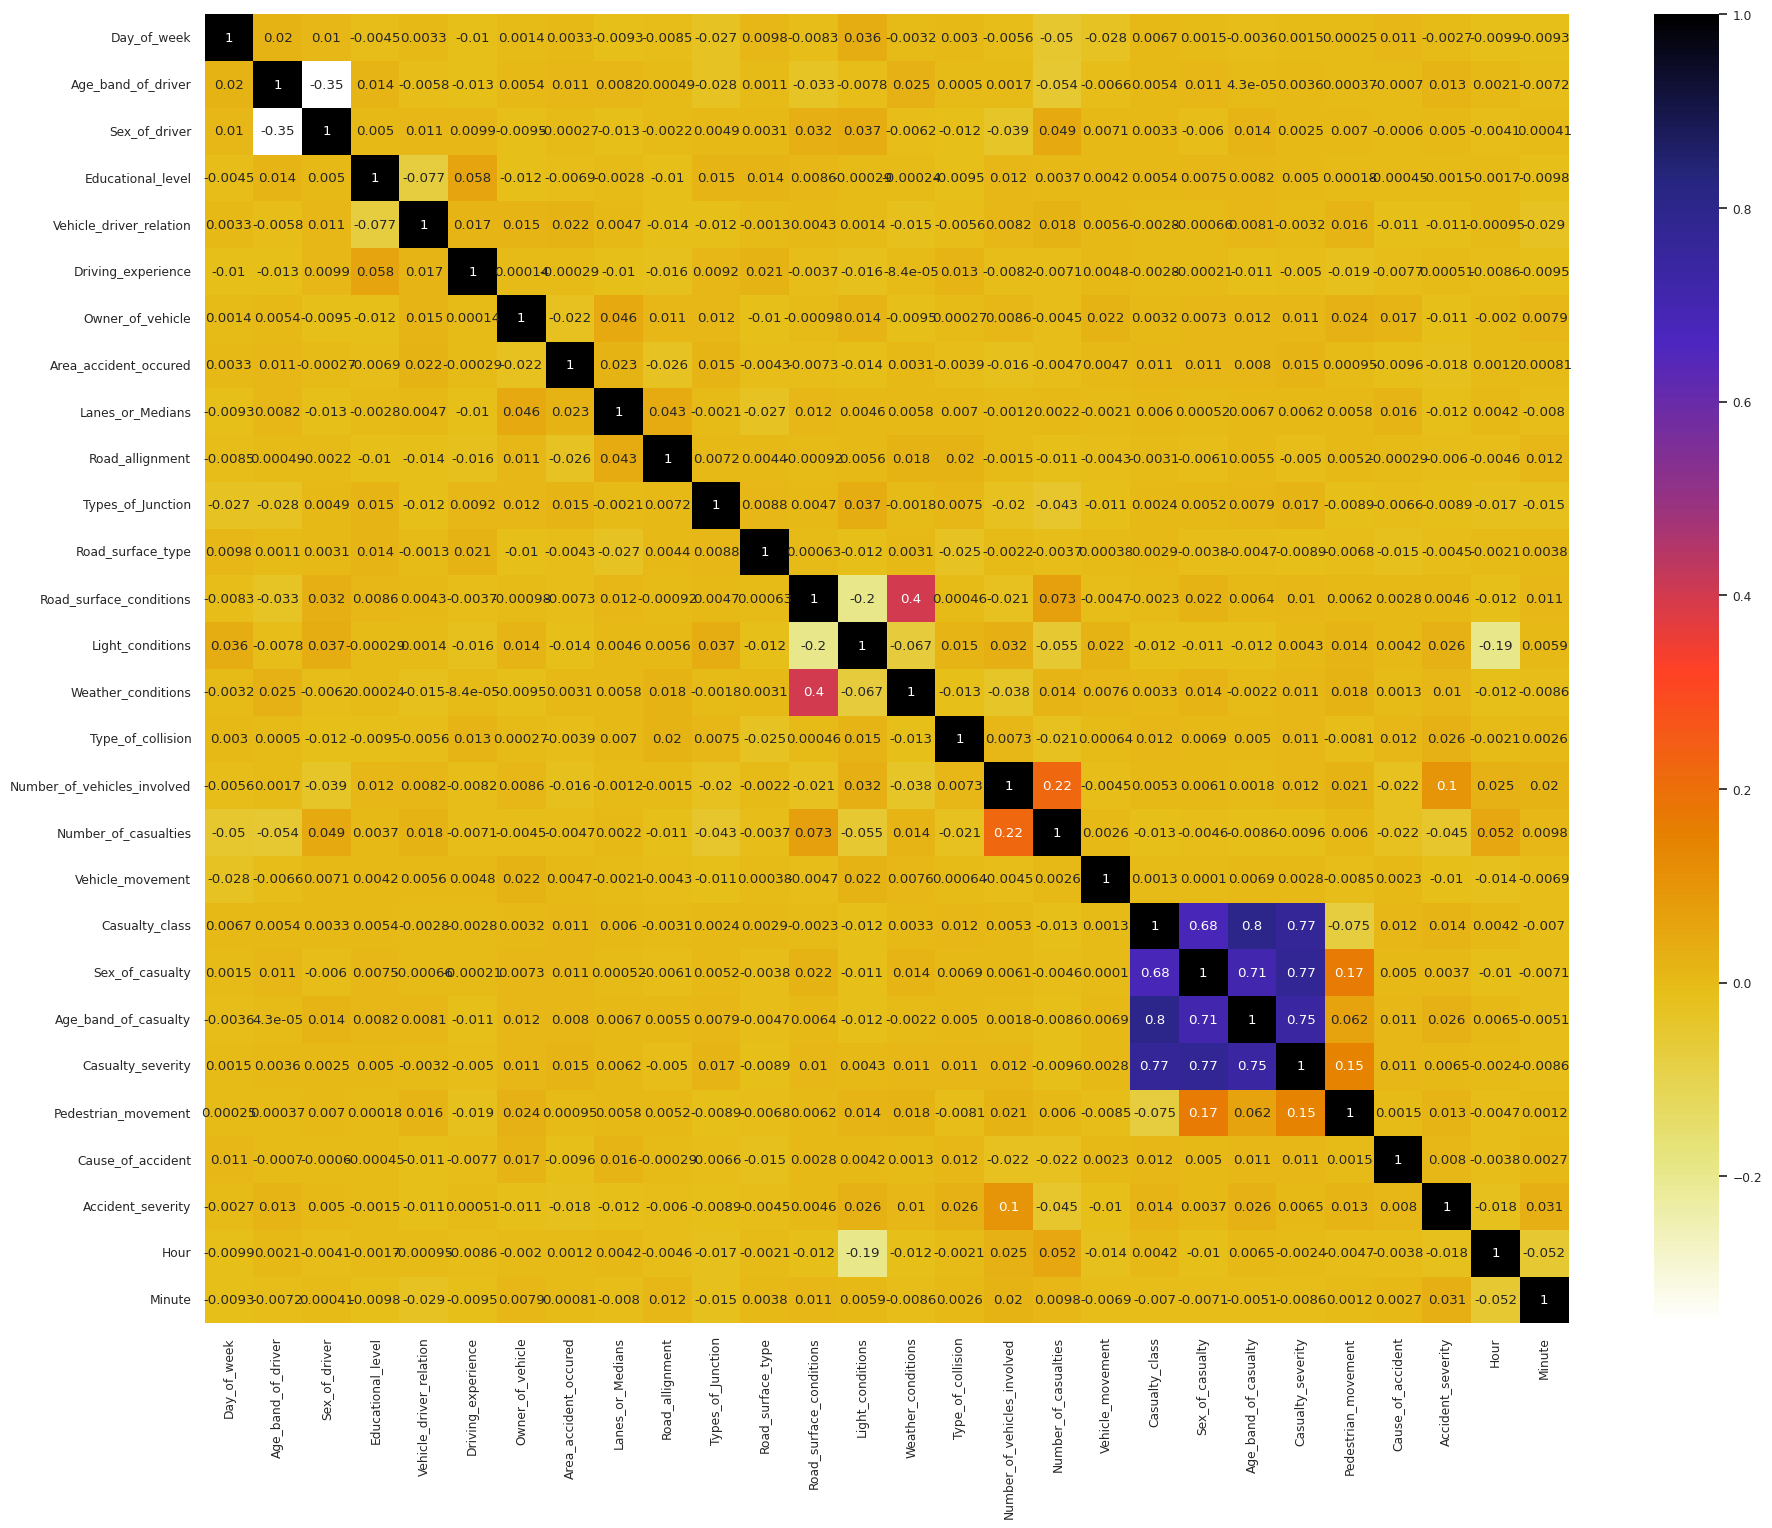

In [202]:
plt.figure(figsize=(22,17))
sns.set(font_scale=0.8)
sns.heatmap(df_new.corr(), annot=True, cmap=plt.cm.CMRmap_r)

In [203]:
# Based on above analysis and domain knowledge, we select below features
# X = df_new[['Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Driving_experience',
#                 'Lanes_or_Medians', 'Types_of_Junction', 'Type_of_collision', 'Number_of_casualties', 'Vehicle_movement',
#                 'Age_band_of_casualty', 'Casualty_severity', 'Cause_of_accident']]
# y = df_new['Accident_severity']

In [204]:
X = df_new.drop(['Accident_severity'], axis = 1)
y = df_new['Accident_severity']

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=200)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9237, 27) (3079, 27) (9237,) (3079,)


In [206]:
# upsampling using smote

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", X_train.shape, y_train.shape)

Class= 0.0, n=118 (1.28%)
Class= 2.0, n=7791 (84.35%)
Class= 1.0, n=1328 (14.38%)
Class= 0.0, n=7791 (33.33%)
Class= 2.0, n=7791 (33.33%)
Class= 1.0, n=7791 (33.33%)
Upsampled data shape:  (23373, 27) (23373,)


In [207]:
# Modelling using XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
accuracy_score(y_test, y_pred_xgb)

0.8596947060734005

In [208]:
# Modelling using RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.8557973367976616

In [209]:
# Modelling using ExtraTreeClassifier
extree = ExtraTreesClassifier()
extree.fit(X_train, y_train)
y_pred_extree = extree.predict(X_test)
accuracy_score(y_test, y_pred_extree)

0.8564468983436181

In [210]:
#Show metrics using XGBClassifier
Accuracy  =  accuracy_score(y_test, y_pred_xgb)
Precision =  precision_score(y_test, y_pred_xgb, average= 'weighted')
Recall    =  recall_score(y_test, y_pred_xgb, average= 'weighted')
F1_score  =  f1_score(y_test, y_pred_xgb, average= 'weighted')
print("Metrics using XGBClassifier: ", "\n" "Accuracy: ", Accuracy, "\nPrecision: ", Precision, "\nRecall: ", Recall, "\nF1_score: ", F1_score)

Metrics using XGBClassifier:  
Accuracy:  0.8596947060734005 
Precision:  0.8299890835141805 
Recall:  0.8596947060734005 
F1_score:  0.8212337318914836


In [211]:
#Show metrics using RandomForestClassifier
Accuracy  =  accuracy_score(y_test, y_pred_rf)
Precision =  precision_score(y_test, y_pred_rf, average= 'weighted')
Recall    =  recall_score(y_test, y_pred_rf, average= 'weighted')
F1_score  =  f1_score(y_test, y_pred_rf, average= 'weighted')
print("Metrics using randomForestClassifier: ", "\n" "Accuracy: ", Accuracy, "\nPrecision: ", Precision, "\nRecall: ", Recall, "\nF1_score: ", F1_score)

Metrics using randomForestClassifier:  
Accuracy:  0.8557973367976616 
Precision:  0.8276298955935799 
Recall:  0.8557973367976616 
F1_score:  0.7993224870012655


In [212]:
#Show metrics using ExtraTreeClassifier
Accuracy  =  accuracy_score(y_test, y_pred_extree)
Precision =  precision_score(y_test, y_pred_extree, average= 'weighted')
Recall    =  recall_score(y_test, y_pred_extree, average= 'weighted')
F1_score  =  f1_score(y_test, y_pred_extree, average= 'weighted')
print("Metrics using ExtraTreeClassifier: ", "\n" "Accuracy: ", Accuracy, "\nPrecision: ", Precision, "\nRecall: ", Recall, "\nF1_score: ", F1_score)

Metrics using ExtraTreeClassifier:  
Accuracy:  0.8564468983436181 
Precision:  0.8357268917300101 
Recall:  0.8564468983436181 
F1_score:  0.8002091815808307
